## Qualitative Analysis for Event Log with Nonlinearities

Implemented decision points with guards:
- Request Manager or Standard Approval:
    - Request Manager Approval if total_price >= 600 or supplier is "Dunder Mifflin"
    - Request Standard Approval if total_price <= 1200
- Manager Rejection or Approval:
    - Manager Rejection if total_price >= 500 and item_amount mod 2 = 1
    - No Guard for Manager Approval 
- Standard Rejection or Approval:
    - Standard Rejection if total_price >= 500 and item_amount mod 2 = 1
    - No Guard for Standard Approval 
- Are the goods fine or damaged?
    - Goods Damaged if item_amount^3 >= total_price
    - No Guard for Goods Fine 
- What happens if the goods are fine?
    - Pay Invoice (no Guard, but dependent on previous attivities: if Goods Fine and Receive Invoice)
    - Cancel Order (no Guard, but dependent on previous attivities: if Goods Fine and either Revocation Costumer or Revocation Vendor)
- What happens after Receive Invoice?
    - Revocation Costumer if supplierMap(supplier) >= item_amount where supplierMap maps "Saturn" to 10, "Dunder Mifflin" to 20, "Staples" to 30 and everything else to 40
    - Recovation Vendor if total_price/item_amount < 100 
    - Pay Invoice (no Guard, but dependent on previous attivities: if Receive Invoice and Goods Fine)
    - Cancel Payment (no Guard, but dependent on previous attivities: if Receive Invoice and Goods Damaged)

In [1]:
import os
from exdpn.util import import_log
from exdpn.data_petri_net import data_petri_net
from exdpn.guards import ML_Technique

#### First, look which machine learning guard has the highest performance for a decision point.

In [2]:
event_log_nonlinearities = import_log(os.path.join(os.getcwd(), '..', 'datasets', 'p2p_nonlinearities.xes'))
dpn_nonlinearities = data_petri_net.Data_Petri_Net(event_log = event_log_nonlinearities, 
                                                  event_level_attributes = ['item_category','item_id','item_amount','supplier','total_price','delay'],
                                                  verbose = False)

decision_points = list(dpn_nonlinearities.decision_points)
decision_points

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


[({'receive invoice'}, {'pay invoice', 'revocation costumer', 'cancel payment', 'revocation vendor'}),
 ({'request manager approval'}, {'manager approve purchase', 'manager reject purchase'}),
 ({'create purchase order'}, {'request manager approval', 'request standard approval'}),
 ({'request standard approval'}, {'reject purchase', 'approve purchase'}),
 ({'goods fine'}, {'pay invoice', 'cancel order'}),
 ({'inspect goods'}, {'goods damaged', 'goods fine'})]

Decision point:  ({'receive invoice'}, {'pay invoice', 'revocation costumer', 'cancel payment', 'revocation vendor'})
Best guard: <exdpn.guards.svm_guard.SVM_Guard object at 0x000001A10B470EB0>


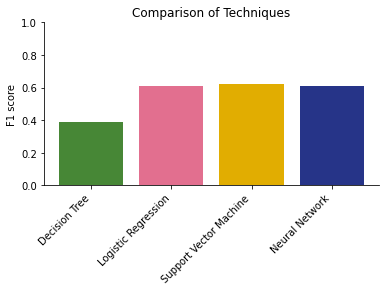

In [3]:
print("Decision point: ", decision_points[0])
dpn_nonlinearities.guard_manager_per_place[decision_points[0]].get_comparison_plot()
best_guard = dpn_nonlinearities.get_guard_at_place(decision_points[0])
print("Best guard:", best_guard)

Decision point:  ({'request manager approval'}, {'manager approve purchase', 'manager reject purchase'})
Best guard: <exdpn.guards.decision_tree_guard.Decision_Tree_Guard object at 0x000001A10B471900>


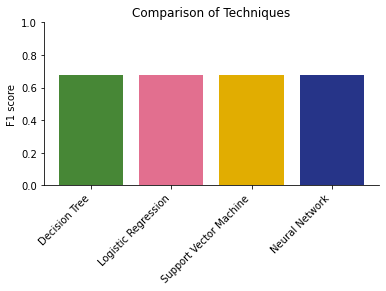

In [4]:
print("Decision point: ", decision_points[1])
dpn_nonlinearities.guard_manager_per_place[decision_points[1]].get_comparison_plot()
best_guard = dpn_nonlinearities.get_guard_at_place(decision_points[1])
print("Best guard:", best_guard)

Decision point:  ({'create purchase order'}, {'request manager approval', 'request standard approval'})
Best guard: <exdpn.guards.neural_network_guard.Neural_Network_Guard object at 0x000001A10B472A40>


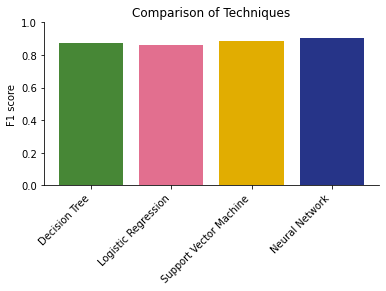

In [5]:
print("Decision point: ", decision_points[2])
dpn_nonlinearities.guard_manager_per_place[decision_points[2]].get_comparison_plot()
best_guard = dpn_nonlinearities.get_guard_at_place(decision_points[2])
print("Best guard:", best_guard)

Decision point:  ({'request standard approval'}, {'reject purchase', 'approve purchase'})
Best guard: <exdpn.guards.neural_network_guard.Neural_Network_Guard object at 0x000001A10B473490>


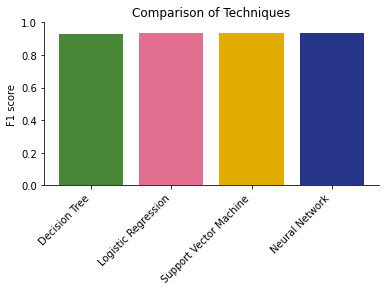

In [6]:
print("Decision point: ", decision_points[3])
dpn_nonlinearities.guard_manager_per_place[decision_points[3]].get_comparison_plot()
best_guard = dpn_nonlinearities.get_guard_at_place(decision_points[3])
print("Best guard:", best_guard)

Decision point:  ({'goods fine'}, {'pay invoice', 'cancel order'})
Best guard: <exdpn.guards.svm_guard.SVM_Guard object at 0x000001A10B473760>


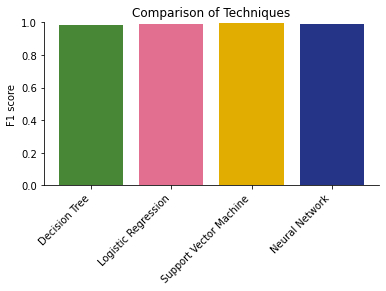

In [7]:
print("Decision point: ", decision_points[4])
dpn_nonlinearities.guard_manager_per_place[decision_points[4]].get_comparison_plot()
best_guard = dpn_nonlinearities.get_guard_at_place(decision_points[4])
print("Best guard:", best_guard)

Decision point:  ({'inspect goods'}, {'goods damaged', 'goods fine'})
Best guard: <exdpn.guards.decision_tree_guard.Decision_Tree_Guard object at 0x000001A10B410370>


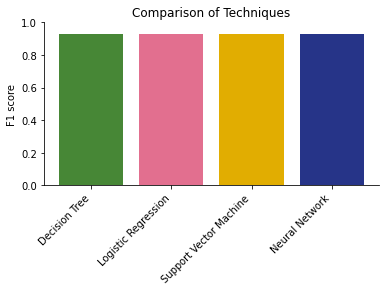

In [8]:
print("Decision point: ", decision_points[5])
dpn_nonlinearities.guard_manager_per_place[decision_points[5]].get_comparison_plot()
best_guard = dpn_nonlinearities.get_guard_at_place(decision_points[5])
print("Best guard:", best_guard)

### Decision Tree 

In [47]:
# import event log and create data petri net
event_log_nonlinearities = import_log(os.path.join(os.getcwd(), '..', 'datasets', 'p2p_nonlinearities.xes'))
dpn_nonlinearities = data_petri_net.Data_Petri_Net(event_log = event_log_nonlinearities, 
                                                  event_level_attributes = ['item_category','item_id','item_amount','supplier','total_price'],
                                                  ml_list = [ML_Technique.DT],
                                                  verbose = False)


decision_points = list(dpn_nonlinearities.decision_points)

Decision point:  ({'create purchase order'}, {'request standard approval', 'request manager approval'})


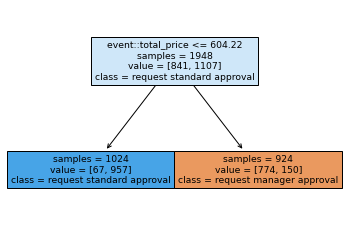

In [48]:
print("Decision point: ", decision_points[0])
dt_guard = dpn_nonlinearities.get_guard_at_place(decision_points[0])
if dt_guard.is_explainable():
    dt_guard.get_explainable_representation()

Decision point:  ({'inspect goods'}, {'goods damaged', 'goods fine'})


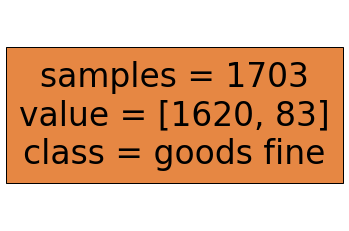

In [49]:
print("Decision point: ", decision_points[1])
dt_guard = dpn_nonlinearities.get_guard_at_place(decision_points[1])
if dt_guard.is_explainable():
    dt_guard.get_explainable_representation()

Decision point:  ({'receive invoice'}, {'pay invoice', 'revocation vendor', 'cancel payment', 'revocation costumer'})


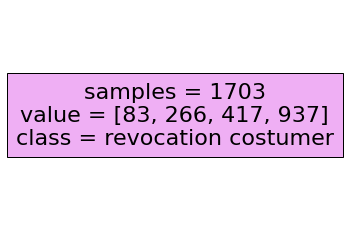

In [50]:
print("Decision point: ", decision_points[2])
dt_guard = dpn_nonlinearities.get_guard_at_place(decision_points[2])
if dt_guard.is_explainable():
    dt_guard.get_explainable_representation()

Decision point:  ({'request standard approval'}, {'approve purchase', 'reject purchase'})


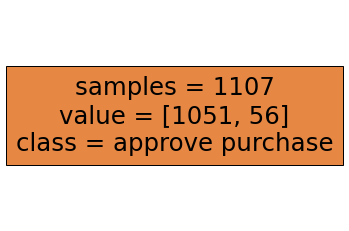

In [51]:
print("Decision point: ", decision_points[3])
dt_guard = dpn_nonlinearities.get_guard_at_place(decision_points[3])
if dt_guard.is_explainable():
    dt_guard.get_explainable_representation()

Decision point:  ({'request manager approval'}, {'manager approve purchase', 'manager reject purchase'})


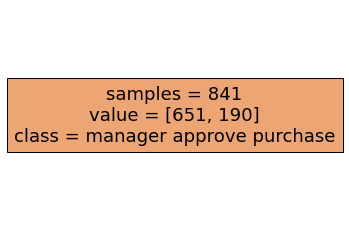

In [52]:
print("Decision point: ", decision_points[4])
dt_guard = dpn_nonlinearities.get_guard_at_place(decision_points[4])
if dt_guard.is_explainable():
    dt_guard.get_explainable_representation()

Decision point:  ({'goods fine'}, {'cancel order', 'pay invoice'})


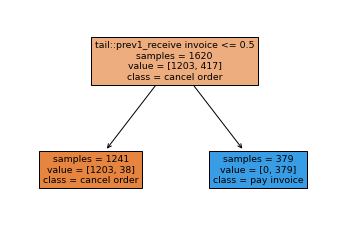

In [53]:
print("Decision point: ", decision_points[5])
dt_guard = dpn_nonlinearities.get_guard_at_place(decision_points[5])
if dt_guard.is_explainable():
    dt_guard.get_explainable_representation()

### Neural Network 

In [54]:
# import event log and create data petri net
event_log_nonlinearities = import_log(os.path.join(os.getcwd(), '..', 'datasets', 'p2p_nonlinearities.xes'))
dpn_nonlinearities = data_petri_net.Data_Petri_Net(event_log = event_log_nonlinearities, 
                                                  event_level_attributes = ['item_category','item_id','item_amount','supplier','total_price'],
                                                  ml_list = [ML_Technique.NN],
                                                  verbose = False)


decision_points = list(dpn_nonlinearities.decision_points)

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Decision point:  ({'request standard approval'}, {'approve purchase', 'reject purchase'})


  0%|          | 0/100 [00:00<?, ?it/s]

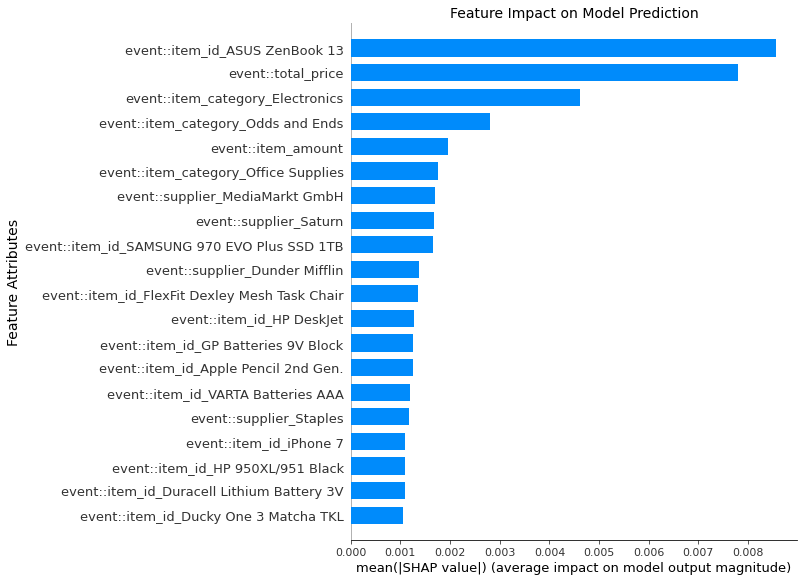

In [55]:
print("Decision point: ", decision_points[0])
nn_guard = dpn_nonlinearities.get_guard_at_place(decision_points[0])
if nn_guard.is_explainable():
    nn_guard.get_explainable_representation()

Decision point:  ({'inspect goods'}, {'goods damaged', 'goods fine'})


  0%|          | 0/100 [00:00<?, ?it/s]

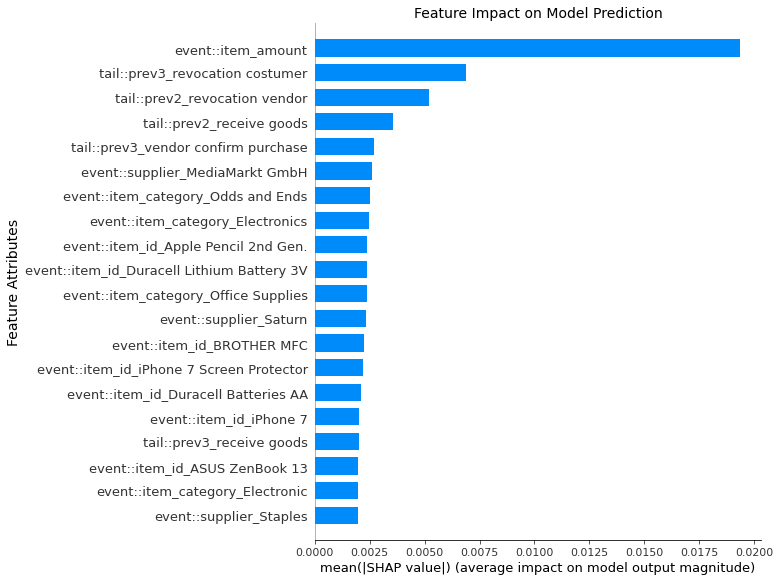

In [56]:
print("Decision point: ", decision_points[1])
nn_guard = dpn_nonlinearities.get_guard_at_place(decision_points[1])
if nn_guard.is_explainable():
    nn_guard.get_explainable_representation()

Decision point:  ({'create purchase order'}, {'request standard approval', 'request manager approval'})


  0%|          | 0/100 [00:00<?, ?it/s]

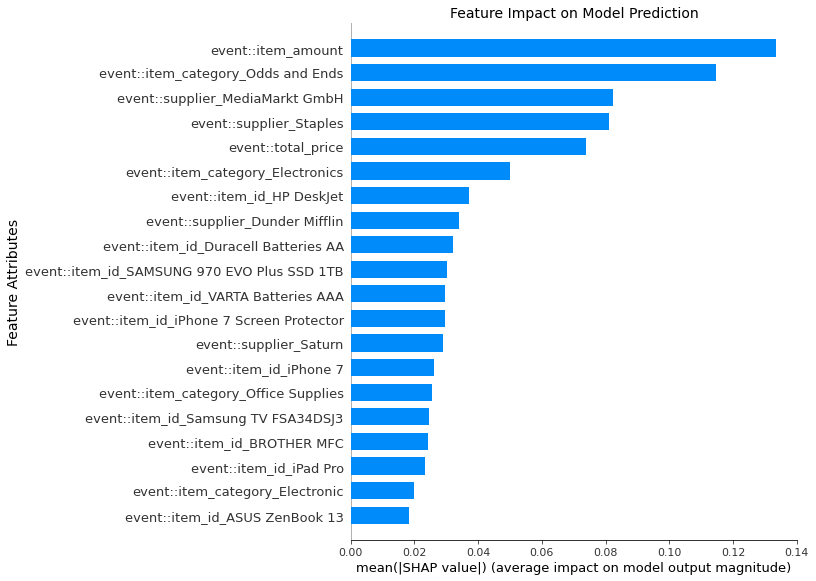

In [57]:
print("Decision point: ", decision_points[2])
nn_guard = dpn_nonlinearities.get_guard_at_place(decision_points[2])
if nn_guard.is_explainable():
    nn_guard.get_explainable_representation()

Decision point:  ({'request manager approval'}, {'manager approve purchase', 'manager reject purchase'})


  0%|          | 0/100 [00:00<?, ?it/s]

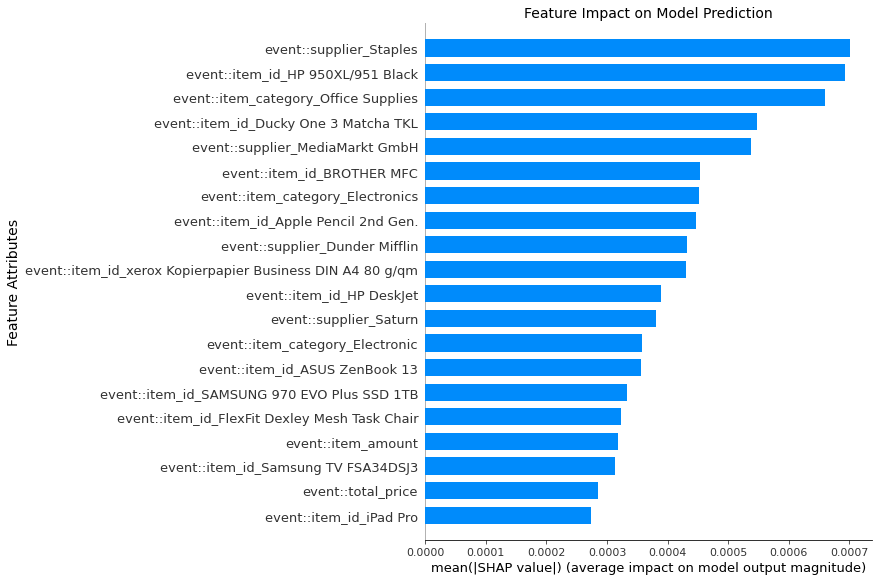

In [58]:
print("Decision point: ", decision_points[3])
nn_guard = dpn_nonlinearities.get_guard_at_place(decision_points[3])
if nn_guard.is_explainable():
    nn_guard.get_explainable_representation()

Decision point:  ({'goods fine'}, {'cancel order', 'pay invoice'})


  0%|          | 0/100 [00:00<?, ?it/s]

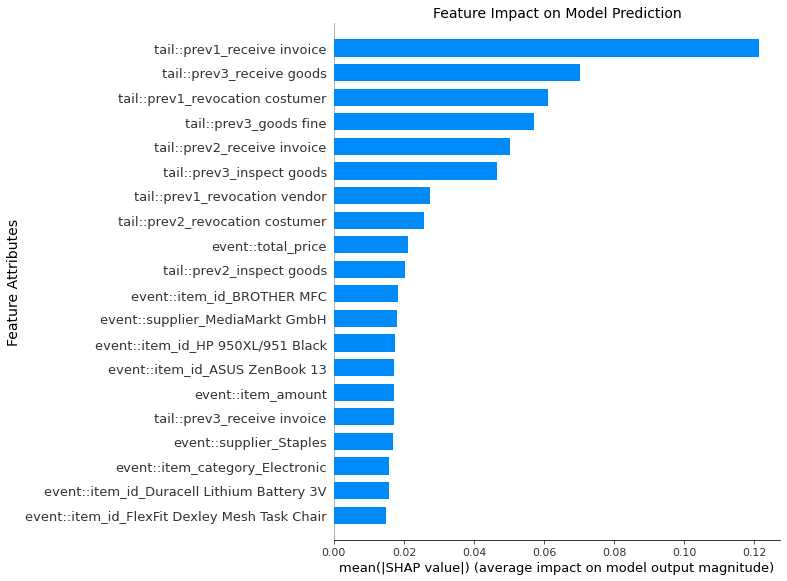

In [59]:
print("Decision point: ", decision_points[4])
nn_guard = dpn_nonlinearities.get_guard_at_place(decision_points[4])
if nn_guard.is_explainable():
    nn_guard.get_explainable_representation()

Decision point:  ({'receive invoice'}, {'pay invoice', 'revocation vendor', 'cancel payment', 'revocation costumer'})


  0%|          | 0/100 [00:00<?, ?it/s]

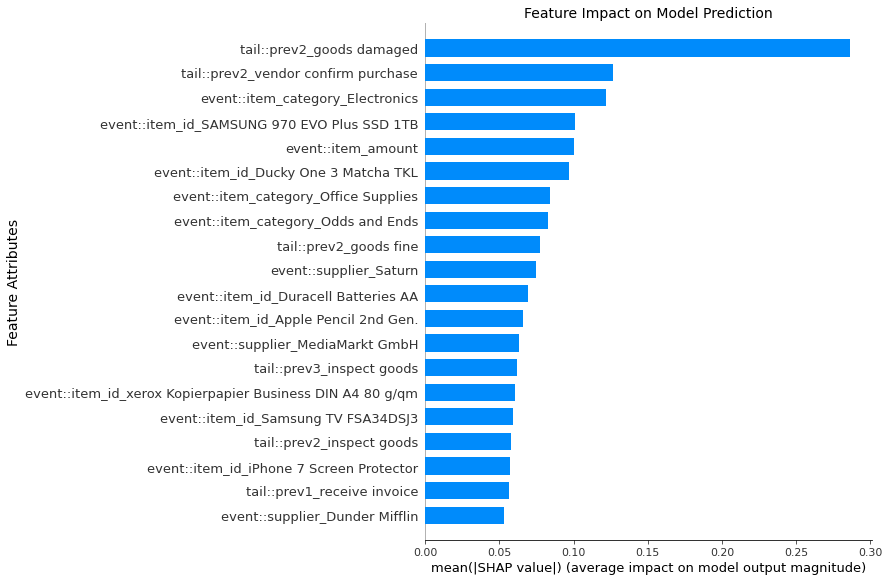

In [60]:
print("Decision point: ", decision_points[5])
nn_guard = dpn_nonlinearities.get_guard_at_place(decision_points[5])
if nn_guard.is_explainable():
    nn_guard.get_explainable_representation()

### Support Vector Machine 

In [61]:
# import event log and create data petri net
event_log_nonlinearities = import_log(os.path.join(os.getcwd(), '..', 'datasets', 'p2p_nonlinearities.xes'))
dpn_nonlinearities = data_petri_net.Data_Petri_Net(event_log = event_log_nonlinearities, 
                                                  event_level_attributes = ['item_category','item_id','item_amount','supplier','total_price'],
                                                  ml_list = [ML_Technique.SVM],
                                                  verbose = False)


decision_points = list(dpn_nonlinearities.decision_points)

Decision point:  ({'create purchase order'}, {'request standard approval', 'request manager approval'})


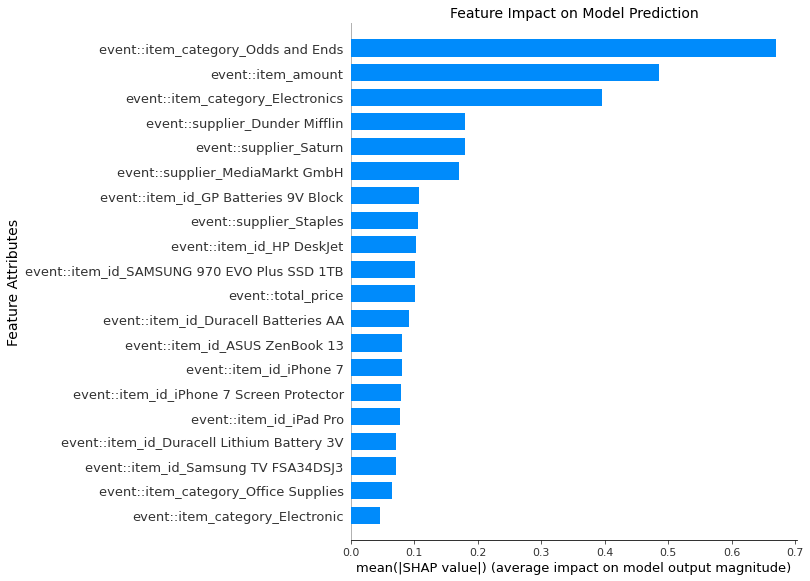

In [62]:
print("Decision point: ", decision_points[0])
svm_guard = dpn_nonlinearities.get_guard_at_place(decision_points[0])
if svm_guard.is_explainable():
    svm_guard.get_explainable_representation()

Decision point:  ({'inspect goods'}, {'goods damaged', 'goods fine'})


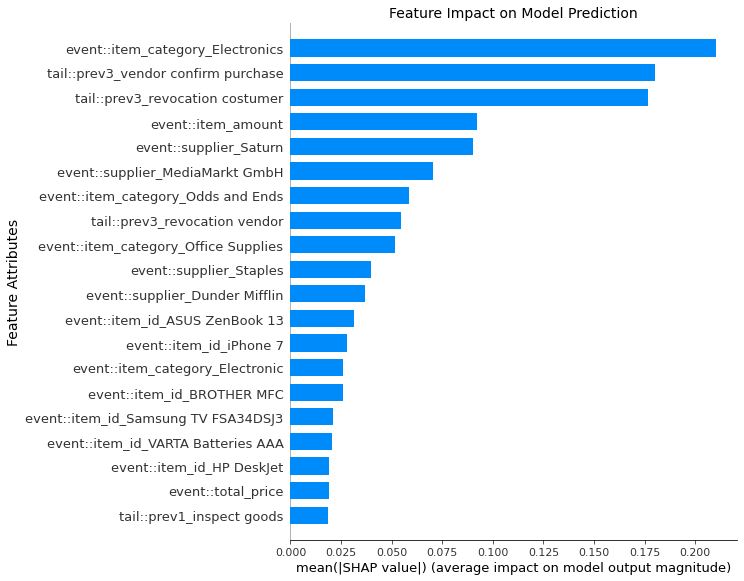

In [63]:
print("Decision point: ", decision_points[1])
svm_guard = dpn_nonlinearities.get_guard_at_place(decision_points[1])
if svm_guard.is_explainable():
    svm_guard.get_explainable_representation()

Decision point:  ({'goods fine'}, {'cancel order', 'pay invoice'})


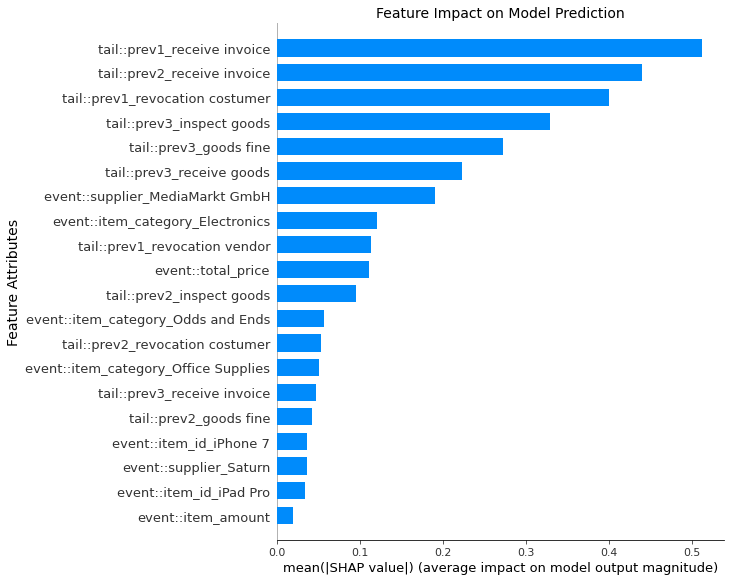

In [64]:
print("Decision point: ", decision_points[2])
svm_guard = dpn_nonlinearities.get_guard_at_place(decision_points[2])
if svm_guard.is_explainable():
    svm_guard.get_explainable_representation()

Decision point:  ({'receive invoice'}, {'pay invoice', 'revocation vendor', 'cancel payment', 'revocation costumer'})


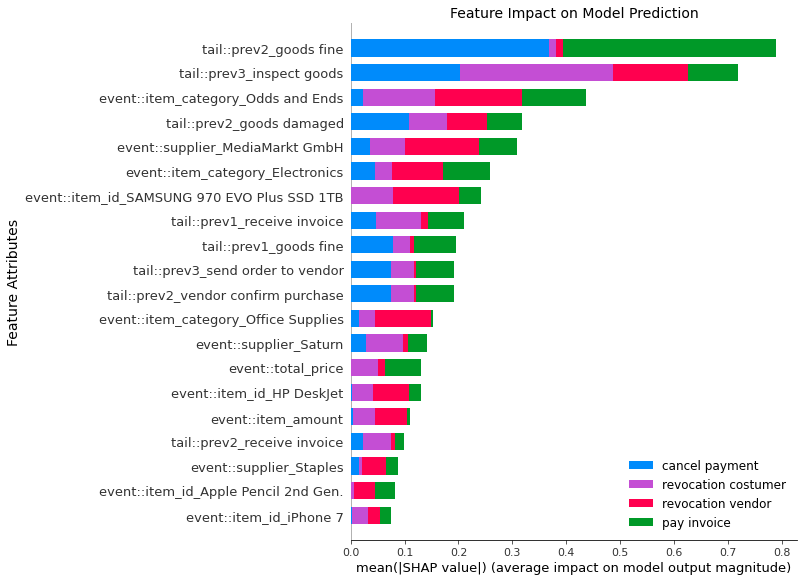

In [65]:
print("Decision point: ", decision_points[3])
svm_guard = dpn_nonlinearities.get_guard_at_place(decision_points[3])
if svm_guard.is_explainable():
    svm_guard.get_explainable_representation()

Decision point:  ({'request standard approval'}, {'approve purchase', 'reject purchase'})


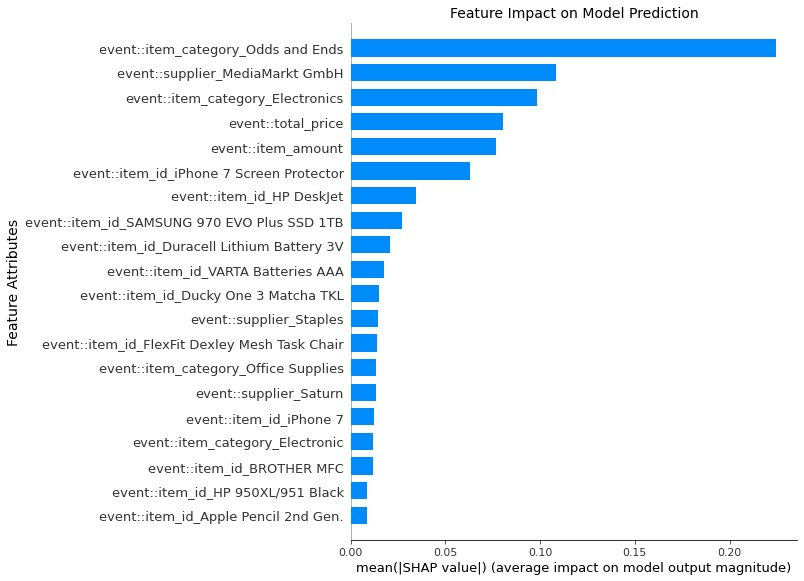

In [66]:
print("Decision point: ", decision_points[4])
svm_guard = dpn_nonlinearities.get_guard_at_place(decision_points[4])
if svm_guard.is_explainable():
    svm_guard.get_explainable_representation()

Decision point:  ({'request manager approval'}, {'manager approve purchase', 'manager reject purchase'})


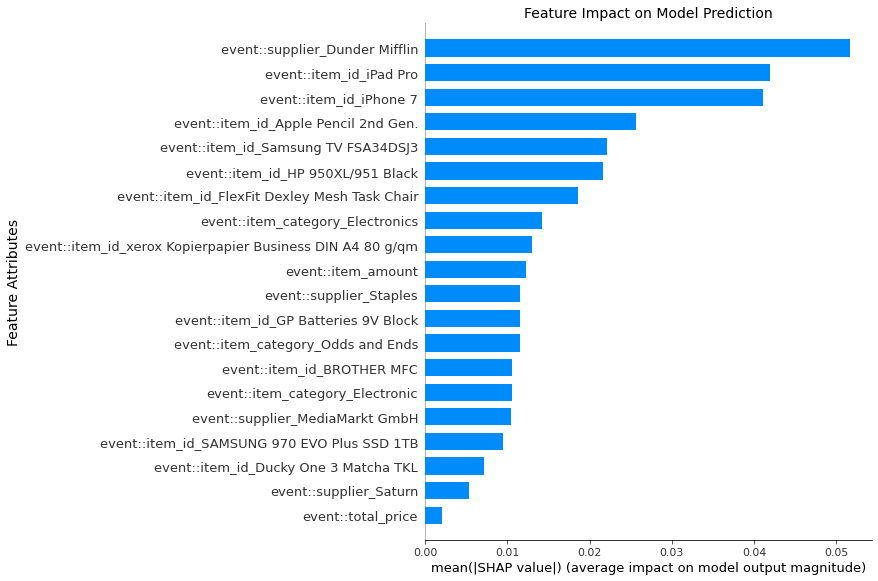

In [67]:
print("Decision point: ", decision_points[5])
svm_guard = dpn_nonlinearities.get_guard_at_place(decision_points[5])
if svm_guard.is_explainable():
    svm_guard.get_explainable_representation()

### Logistic Regression 

In [68]:
# import event log and create data petri net
event_log_nonlinearities = import_log(os.path.join(os.getcwd(), '..', 'datasets', 'p2p_nonlinearities.xes'))
dpn_nonlinearities = data_petri_net.Data_Petri_Net(event_log = event_log_nonlinearities, 
                                                  event_level_attributes = ['item_category','item_id','item_amount','supplier','total_price'],
                                                  ml_list = [ML_Technique.LR],
                                                  verbose = False)

decision_points = list(dpn_nonlinearities.decision_points)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Decision point:  ({'create purchase order'}, {'request standard approval', 'request manager approval'})


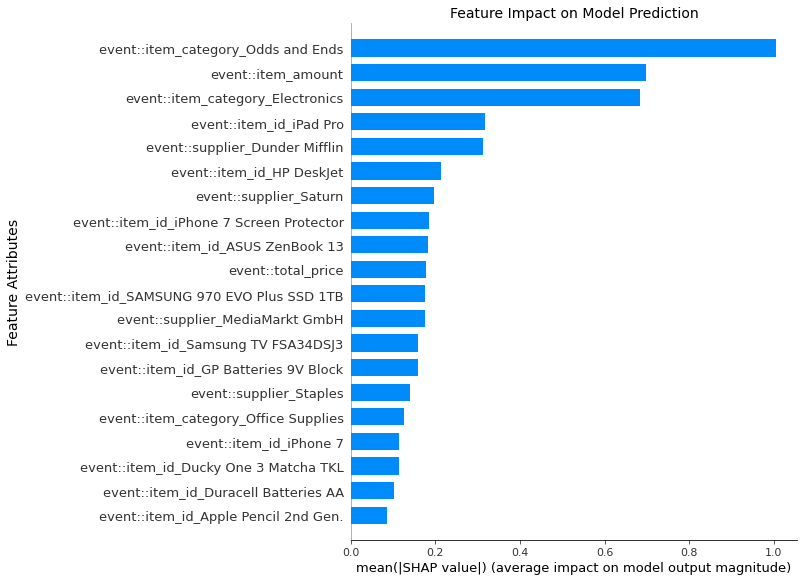

In [69]:
print("Decision point: ", decision_points[0])
lr_guard = dpn_nonlinearities.get_guard_at_place(decision_points[0])
if lr_guard.is_explainable():
    lr_guard.get_explainable_representation()

Decision point:  ({'inspect goods'}, {'goods damaged', 'goods fine'})


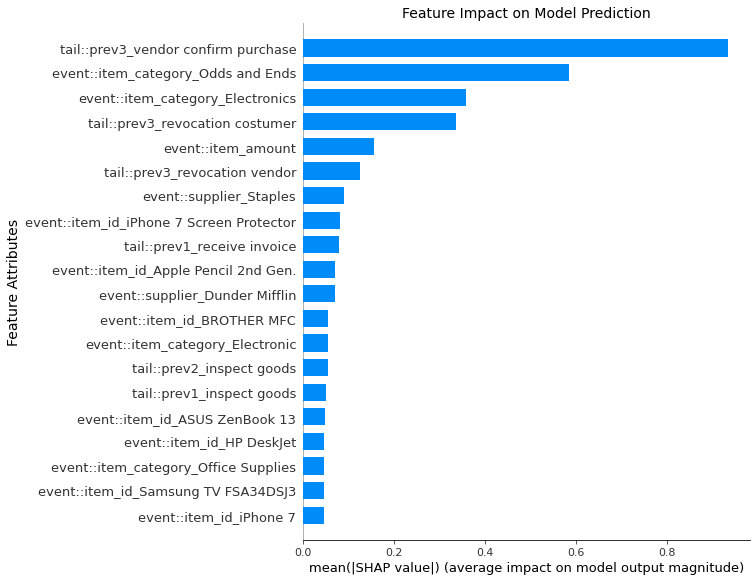

In [70]:
print("Decision point: ", decision_points[1])
lr_guard = dpn_nonlinearities.get_guard_at_place(decision_points[1])
if lr_guard.is_explainable():
    lr_guard.get_explainable_representation()

Decision point:  ({'request standard approval'}, {'approve purchase', 'reject purchase'})


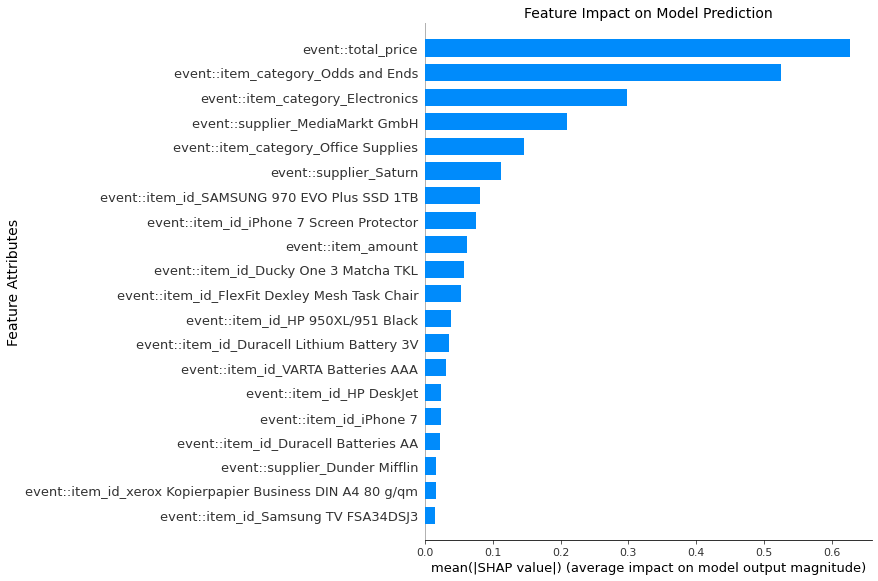

In [71]:
print("Decision point: ", decision_points[2])
lr_guard = dpn_nonlinearities.get_guard_at_place(decision_points[2])
if lr_guard.is_explainable():
    lr_guard.get_explainable_representation()

Decision point:  ({'request manager approval'}, {'manager approve purchase', 'manager reject purchase'})


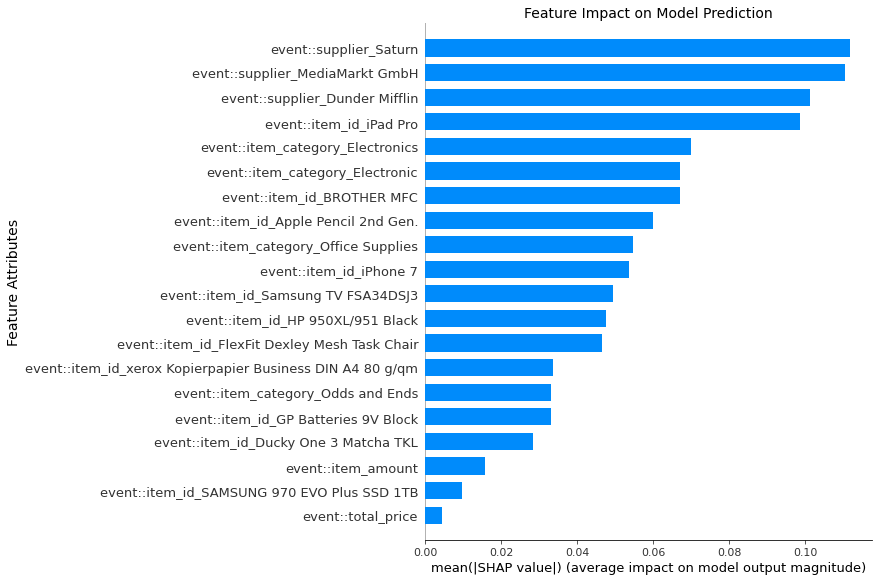

In [72]:
print("Decision point: ", decision_points[3])
lr_guard = dpn_nonlinearities.get_guard_at_place(decision_points[3])
if lr_guard.is_explainable():
    lr_guard.get_explainable_representation()

Decision point:  ({'goods fine'}, {'cancel order', 'pay invoice'})


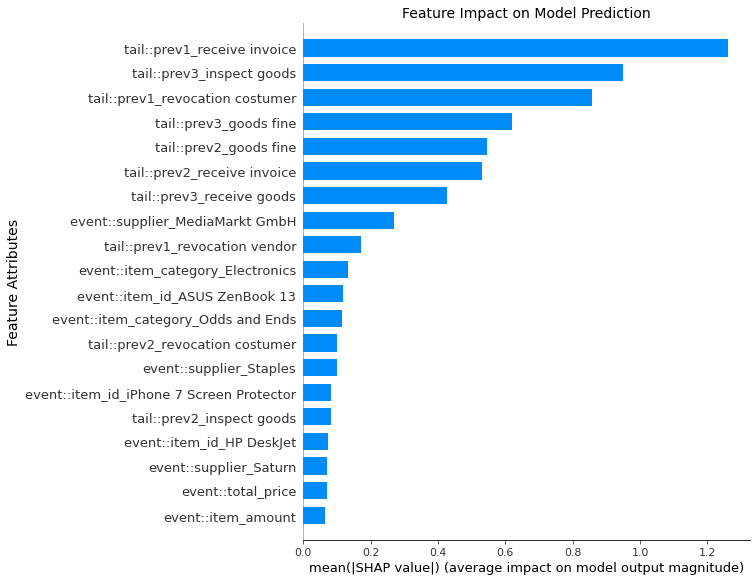

In [73]:
print("Decision point: ", decision_points[4])
lr_guard = dpn_nonlinearities.get_guard_at_place(decision_points[4])
if lr_guard.is_explainable():
    lr_guard.get_explainable_representation()

Decision point:  ({'receive invoice'}, {'pay invoice', 'revocation vendor', 'cancel payment', 'revocation costumer'})


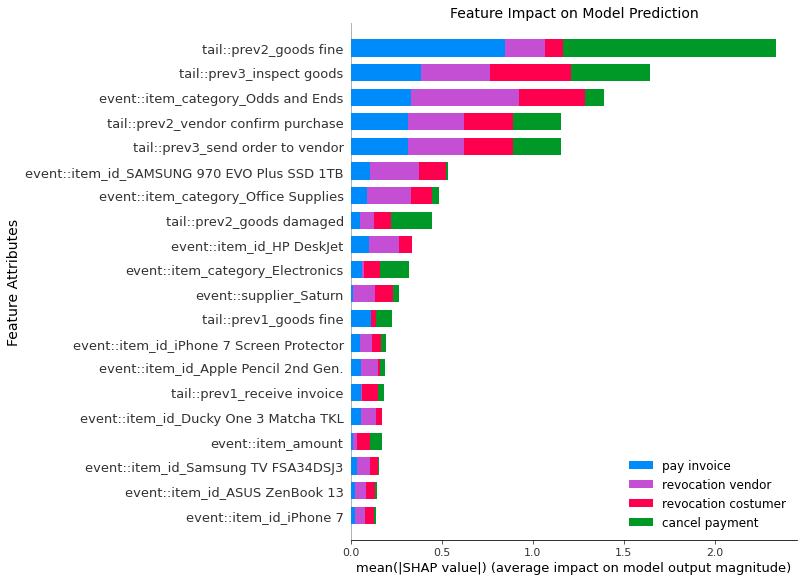

In [74]:
print("Decision point: ", decision_points[5])
lr_guard = dpn_nonlinearities.get_guard_at_place(decision_points[5])
if lr_guard.is_explainable():
    lr_guard.get_explainable_representation()

### Summary event log with Nonlinearities:

- Request Manager or Standard Approval:  
Only the Decision Tree guard models the true underlying guard. The split to classify the date samples is total_price <= 604. For the other three machine learning techniques the other feature attributes like  item_amount have a huge impact on the model prediction, these attributes are likely to be correlated with total_price.

- Manager Rejection or Approval:  
All machine learning techniques have problems modelling the true underlying guard. We can see that the Support Vector Machine guard, Neural Network guard and Logistic Regression guard seem to pick up noise instead of the true underlying guard. But it is possible that the features with the most impact correlate with the total_price. The Decision Tree guard assigns all samples to the same class label, which could be due to one of the stop criteria the Decision Tree Classifier uses. 

- Standard Rejection or Approval:  
The Decision Tree guard again assigns all samples to the same class label. While the Support Vector Machine guard seems to pick up noise instead of the true underlying guard, for the Neural Network guard and Logistic Regression guard total_price has a huge impact on the model prediction. 

- Are the goods fine or damaged?  
The Decision Tree guard again assigns all samples to the same class label. The Support Vector Machine guard and Logistic Regression guard are also not able to detect the true underlying guard. Only for the Neural Network guard item_amount is the feature attribute with the greatest impact on the model prediction.

- What happens if the goods are fine?  
All four machine learing techniques acomplish to model the true underlying guard using mainly previous activities which have impact on what happens if the goods are fine. 

- What happens after Receive Invoice?  
The Decision Tree guard again assigns all samples to the same class label. The other three machine learning guards perform quite well in modeling the true underlying guard and either use possibly correlated attribute features or features that are directly associated with the true underlying guard. 

Overall, the different machine learning techniques perform quite differently modelling the true underlying guard if nonlinearities are at play. The modeled Decision Trees fail to model the true underlying guards most of the times, while the Neural Network guards seem to handel the nonlinearities quite well, followed by the Logistic Regression guards and Support Vector Machine guards. While for Goods fine or damaged, Standard Rejection or Approval, Request Manager or Standard Approval and what happens if good are fine are quite good, all four techniques only have mediocre performance scores measures using F1-score for Manager Rejection or Approval and what happens after Receive Invoice as seen in the comparision plots.